# Financial Phrases labeled data

The sentiment classification for loughran mcdonald, harvard dictionary, Finbert, stanford core nlp recursive network for all the different sentiment agree classes

In [10]:
#!pip install pysentiment2
#!pip install pycorenlp
import pandas as pd
import os
import pysentiment2 as ps
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from pycorenlp import StanfordCoreNLP

In [52]:
agree_50 = pd.read_csv('Sentences_50Agree.txt', sep='@', encoding='latin-1', header=None)
agree_66 = pd.read_csv('Sentences_66Agree.txt', sep='@', encoding='latin-1', header=None)
agree_75 = pd.read_csv('Sentences_75Agree.txt', sep='@', encoding='latin-1', header=None)
agree_all = pd.read_csv('Sentences_AllAgree.txt', sep='@', encoding='latin-1', header=None)

agree_50.head()

,0,1
0,"According to Gran , the company has no plans t...",neutral
1,Technopolis plans to develop in stages an area...,neutral
2,The international electronic industry company ...,negative
3,With the new production plant the company woul...,positive
4,According to the company 's updated strategy f...,positive


In [58]:

agree_all

,text,label
0,according to gran the company has no plans t...,neutral
1,for the last quarter of componenta s n...,positive
2,in the third quarter of net sales incre...,positive
3,operating profit rose to eur mn from eur ...,positive
4,operating profit totalled eur mn up fro...,positive
...,...,...
2259,operating result for the month period decre...,negative
2260,helsinki thomson financial shares in cargote...,negative
2261,london marketwatch share prices ended lower...,negative
2262,operating profit fell to eur mn from eur ...,negative


In [57]:
def lower_sentence(data):
    data[0]=data[0].str.lower()
    data[0]=data[0].str.replace("  ",'')
    data[0]=data[0].str.replace('[^a-z]',' ', regex=True).str.strip()  
    data.rename(columns={1: 'label', 0:'text'}, inplace=True)
lower_sentence(agree_all)
lower_sentence(agree_75)
lower_sentence(agree_66)
#lower_sentence(agree_50)

KeyError: 0

In [59]:
agree_50

,text,label
0,according to gran the company has no plans t...,neutral
1,technopolis plans to develop in stages an area...,neutral
2,the international electronic industry company ...,negative
3,with the new production plant the company woul...,positive
4,according to the company s updated strategy f...,positive
...,...,...
4841,london marketwatch share prices ended lower...,negative
4842,rinkuskiai s beer sales fell by per cent ...,neutral
4843,operating profit fell to eur mn from eur ...,negative
4844,net sales of the paper segment decreased to eu...,negative


Loughran Mcdonald 

In [60]:

def lm_calculation(data):
    length=[]
    positive_lm=[]
    negative_lm=[]
    lm=ps.LM()
    for i in data['text']:
        tokens=lm.tokenize(i)
        positive_lm.append(lm.get_score(tokens)['Positive'])
        negative_lm.append(lm.get_score(tokens)['Negative'])
    data['positive_lm'] =positive_lm
    data['negative_lm'] =negative_lm
    
lm_calculation(agree_all)  
lm_calculation(agree_75)
lm_calculation(agree_66)
lm_calculation(agree_50)


In [61]:
def lm_classification(data):
    data['classification_lm']='positive'
    data.loc[data['positive_lm'] < data['negative_lm'], 'classification_lm'] ='negative'
    data.loc[data['negative_lm'] == data['positive_lm'],'classification_lm']='neutral'

lm_classification(agree_all)    
lm_classification(agree_75)
lm_classification(agree_66)
lm_classification(agree_50)


In [62]:
def accuracy(data):
    return sklearn.metrics.accuracy_score(data['label'], data['classification_lm'])
print(accuracy(agree_all))    
print(accuracy(agree_75))   
print(accuracy(agree_66))
print(accuracy(agree_50))


0.6029151943462897
0.5960034752389227
0.5816931467868153
0.5742880726372266


In [63]:
def confusion_matrix(data):
    return sklearn.metrics.confusion_matrix(data['label'], data['classification_lm'])
confusion_matrix(agree_all)
confusion_matrix(agree_75)
confusion_matrix(agree_66)
confusion_matrix(agree_50)

array([[ 212,  278,  114],
       [ 392, 2091,  396],
       [ 167,  716,  480]], dtype=int64)

In [64]:
def f1_score(data):
    return sklearn.metrics.f1_score(data['label'], data['classification_lm'], average='weighted')
print(f1_score(agree_all))
print(f1_score(agree_75))
print(f1_score(agree_66))
print(f1_score(agree_50))

0.5962174546900239
0.5926234065121838
0.5770260763088496
0.5697724696728712


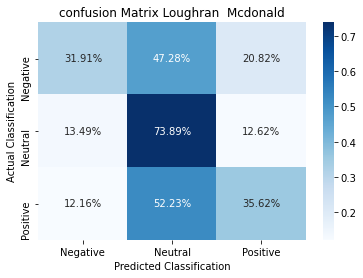

In [67]:
def graph(data):
    confusion_matrix1 =confusion_matrix(data)
    confusion_matrix1=confusion_matrix1.astype('float')/confusion_matrix1.sum(axis=1)[:,np.newaxis]
    ax = sns.heatmap(confusion_matrix1, annot =True, fmt='.2%', cmap='Blues')
    ax.set_title('confusion Matrix Loughran  Mcdonald')
    ax.set_xlabel('Predicted Classification')
    ax.set_ylabel('Actual Classification')
    ax.xaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'])
    ax.yaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'])
    plt.savefig('lm_phrases_66')
    plt.show()
#graph(agree_all)
#graph(agree_75)
graph(agree_66)
#graph(agree_50)

# Harvard iv dictionary

In [68]:

def harvard_calculation(data):
    length=[]
    positive_HIV4=[]
    negative_HIV4=[]
    HIV4=ps.HIV4()
    for i in data['text']:
        tokens=HIV4.tokenize(i)
        positive_HIV4.append(HIV4.get_score(tokens)['Positive'])
        negative_HIV4.append(HIV4.get_score(tokens)['Negative'])
    data['positive_HIV4'] =positive_HIV4
    data['negative_HIV4'] =negative_HIV4
harvard_calculation(agree_all)    
harvard_calculation(agree_75)
harvard_calculation(agree_66)
harvard_calculation(agree_50)

In [69]:
def HIV4_classification(data):
    data['classification_HIV4']='positive'
    data.loc[data['positive_HIV4'] < data['negative_HIV4'], 'classification_HIV4'] ='negative'
    data.loc[data['negative_HIV4'] == data['positive_HIV4'],'classification_HIV4']='neutral'

HIV4_classification(agree_all)    
HIV4_classification(agree_75)
HIV4_classification(agree_66)
HIV4_classification(agree_50)


In [70]:
def f1_score(data):
    return sklearn.metrics.f1_score(data['label'], data['classification_HIV4'], average='weighted')
print(f1_score(agree_all))
print(f1_score(agree_75))
print(f1_score(agree_66))
print(f1_score(agree_50))

0.3666033563975508
0.3593282284871957
0.35720494135772723
0.35867745054632255


In [71]:
def accuracy_HIV4(data):
    return sklearn.metrics.accuracy_score(data['label'], data['classification_HIV4'])
print(accuracy_HIV4(agree_all))    
print(accuracy_HIV4(agree_75))    
print(accuracy_HIV4(agree_66))    
print(accuracy_HIV4(agree_50))    



0.36881625441696114
0.3660584998551984
0.3720654493715912
0.37598018984729675


In [72]:
def confusion_matrix_HIV4(data):
    return sklearn.metrics.confusion_matrix(data['label'], data['classification_HIV4'])
confusion_matrix_HIV4(agree_all)
confusion_matrix_HIV4(agree_75)
confusion_matrix_HIV4(agree_66)
confusion_matrix_HIV4(agree_50)

array([[ 146,  178,  280],
       [ 207,  691, 1981],
       [ 105,  273,  985]], dtype=int64)

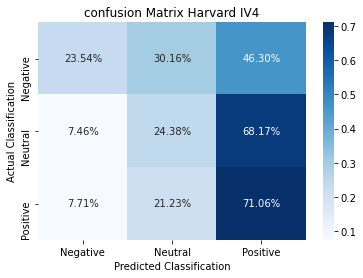

In [75]:
def graph(data):
    confusion_matrix1 =confusion_matrix_HIV4(data)
    confusion_matrix1=confusion_matrix1.astype('float')/confusion_matrix1.sum(axis=1)[:,np.newaxis]
    ax = sns.heatmap(confusion_matrix1, annot =True, fmt='.2%', cmap='Blues')
    ax.set_title('confusion Matrix Harvard IV4')
    ax.set_xlabel('Predicted Classification')
    ax.set_ylabel('Actual Classification')
    ax.xaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'])
    ax.yaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'])
    plt.savefig('harvard_phrases_66')
    plt.show()
#graph(agree_all)
#graph(agree_75)
#graph(agree_66)
#graph(agree_50)

# Finbert

In [30]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

nlp = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer)

sentences = ["there is a shortage of capital, and we need extra financing",  
             "growth is strong and we have plenty of liquidity", 
             "there are doubts about our finances", 
             "profits are flat"]
results = nlp(sentences)
print(results)  #LABEL_0: neutral; LABEL_1: positive; LABEL_2: negative

[{'label': 'Negative', 'score': 0.9966173768043518}, {'label': 'Positive', 'score': 1.0}, {'label': 'Negative', 'score': 0.9999710321426392}, {'label': 'Neutral', 'score': 0.9889442920684814}]


In [76]:

labels={0:'neutral', 1:'positive',2:'negative'}
def classification_fin(data):
    classification_finbert=[]
    for i in data['text']:
        inputs=tokenizer(i, return_tensors='pt', padding=True)
        outputs = finbert(**inputs)[0]
        classification_finbert.append(labels[np.argmax(outputs.detach().numpy())])
    data['classification_finbert']=classification_finbert
classification_fin(agree_all)
classification_fin(agree_75)
classification_fin(agree_66)
#classification_fin(agree_50)

In [77]:
def accuracy_fin(data):
    return sklearn.metrics.accuracy_score(data['label'], data['classification_finbert'])
print(accuracy_fin(agree_all))    
print(accuracy_fin(agree_75))    
print(accuracy_fin(agree_66))    
print(accuracy_fin(agree_50))    

0.9068021201413428
0.8627280625543006
0.8174057386767845


KeyError: 'classification_finbert'

In [78]:
def f1_score(data):
    return sklearn.metrics.f1_score(data['label'], data['classification_finbert'], average='weighted')
print(f1_score(agree_all))
print(f1_score(agree_75))
print(f1_score(agree_66))
print(f1_score(agree_50))

0.9029393974569676
0.8570824488008564
0.8092044325856887


KeyError: 'classification_finbert'

In [79]:
def confusion_matrix_fin(data):
    return sklearn.metrics.confusion_matrix(data['label'], data['classification_finbert'])
confusion_matrix_fin(agree_all)
confusion_matrix_fin(agree_75)
confusion_matrix_fin(agree_66)
#confusion_matrix_fin(agree_50)

array([[ 378,  126,   10],
       [  50, 2386,   99],
       [  49,  436,  683]], dtype=int64)

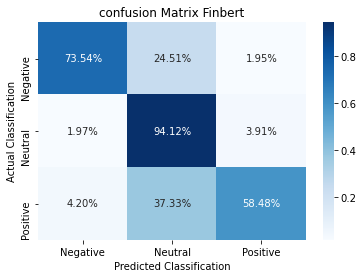

In [82]:
def graph(data):
    confusion_matrix1 =confusion_matrix_fin(data)
    confusion_matrix1=confusion_matrix1.astype('float')/confusion_matrix1.sum(axis=1)[:,np.newaxis]
    ax = sns.heatmap(confusion_matrix1, annot =True, fmt='.2%', cmap='Blues')
    ax.set_title('confusion Matrix Finbert')
    ax.set_xlabel('Predicted Classification')
    ax.set_ylabel('Actual Classification')
    ax.xaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'])
    ax.yaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'])
    plt.savefig('fin_phrases_66')
    plt.show()
#graph(agree_all)
#graph(agree_75)
#graph(agree_66)
#graph(agree_50)

# Stanford Core NLP: RNN

In [ ]:
os.chdir('C:/Program Files/Java/jre1.8.0_331/bin')

In [ ]:
echo "the quick brown fox jumped over the lazy dog" > test.txt

In [4]:
DPATH="C:/Users/Mia/Downloads/stanford-corenlp-4.4.0"
!java -mx6g -cp "$DPATH/*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -timeout 5000

[main] INFO CoreNLP - --- StanfordCoreNLPServer#main() called ---
[main] INFO CoreNLP - Server default properties:
			(Note: unspecified annotator properties are English defaults)
			inputFormat = text
			outputFormat = json
			prettyPrint = false
[main] INFO CoreNLP - Threads: 8
[main] INFO CoreNLP - Starting server...
[main] WARN CoreNLP - java.net.BindException: Address already in use: bind
  sun.nio.ch.Net.bind0(Native Method)
  sun.nio.ch.Net.bind(Unknown Source)
  sun.nio.ch.Net.bind(Unknown Source)
  sun.nio.ch.ServerSocketChannelImpl.bind(Unknown Source)
  sun.nio.ch.ServerSocketAdaptor.bind(Unknown Source)
  sun.net.httpserver.ServerImpl.<init>(Unknown Source)
  sun.net.httpserver.HttpServerImpl.<init>(Unknown Source)
  sun.net.httpserver.DefaultHttpServerProvider.createHttpServer(Unknown Source)
  com.sun.net.httpserver.HttpServer.create(Unknown Source)
  edu.stanford.nlp.pipeline.StanfordCoreNLPServer.run(StanfordCoreNLPServer.java:1534)
  edu.stanford.nlp.pipeline.StanfordC

In [83]:
nlp = StanfordCoreNLP('http://localhost:9000')

In [84]:
import pandas as pd
os.chdir('C:/Users/Mia/Downloads')

In [43]:
print(agree_75['classification_RNN']== 'NaN')

KeyError: 'classification_RNN'

In [85]:
agree_all

,text,label,positive_lm,negative_lm,classification_lm,positive_HIV4,negative_HIV4,classification_HIV4,classification_finbert
0,according to gran the company has no plans t...,neutral,0.0,0.0,neutral,4.0,0.0,positive,neutral
1,for the last quarter of componenta s n...,positive,1.0,1.0,neutral,1.0,4.0,negative,positive
2,in the third quarter of net sales incre...,positive,1.0,0.0,positive,2.0,0.0,positive,positive
3,operating profit rose to eur mn from eur ...,positive,1.0,0.0,positive,2.0,0.0,positive,positive
4,operating profit totalled eur mn up fro...,positive,1.0,0.0,positive,2.0,0.0,positive,positive
...,...,...,...,...,...,...,...,...,...
2259,operating result for the month period decre...,negative,1.0,0.0,positive,2.0,2.0,neutral,negative
2260,helsinki thomson financial shares in cargote...,negative,1.0,3.0,negative,2.0,1.0,positive,negative
2261,london marketwatch share prices ended lower...,negative,1.0,2.0,negative,1.0,1.0,neutral,negative
2262,operating profit fell to eur mn from eur ...,negative,1.0,0.0,positive,2.0,0.0,positive,negative


In [86]:
def RNN_classification(data):
    classification_RNN=[]
    for i in data['text']:
            result= nlp.annotate(i,
                                properties={'annotators': 'sentiment',
                                           'outputFormat':'json','timeout':40000})
            classification_RNN.append(result['sentences'][0]['sentiment'])
    data['classification_RNN']=classification_RNN
    data['classification_RNN']=data['classification_RNN'].str.lower()
RNN_classification(agree_all)
RNN_classification(agree_75)
RNN_classification(agree_66)
#RNN_classification(agree_50)

In [100]:
agree_all.loc[(agree_all['classification_RNN'] == 'verypositive')] = 'positive'
agree_66.loc[(agree_66['classification_RNN'] == 'verypositive')] = 'positive'
agree_75.loc[(agree_75['classification_RNN'] == 'verypositive')] = 'positive'
#agree_50.loc[(agree_50['classification_RNN'] == 'verypositive')] = 'positive'

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [94]:
def accuracy_RNN(data):
    return sklearn.metrics.accuracy_score(data['label'], data['classification_RNN'])
print(accuracy_RNN(agree_all))    
print(accuracy_RNN(agree_75))    
print(accuracy_RNN(agree_66))    
#print(accuracy_RNN(agree_50))    

0.515017667844523
0.5140457573124819
0.49988143229784204


In [95]:
def f1_score(data):
    return sklearn.metrics.f1_score(data['label'], data['classification_RNN'], average='weighted')
print(f1_score(agree_all))
print(f1_score(agree_75))
print(f1_score(agree_66))
#print(f1_score(agree_50))

0.5068872955928929
0.5146825010292264
0.5008704800507123


In [99]:
def confusion_matrix_rnn(data):
    return sklearn.metrics.confusion_matrix(data['label'], data['classification_RNN'])
print(confusion_matrix_rnn(agree_all))
print(confusion_matrix_rnn(agree_75))
confusion_matrix_rnn(agree_66)
#confusion_matrix_rnn(agree_50)

[[145 143  15]
 [265 921 204]
 [125 346 100]]
[[ 195  206   19    0]
 [ 412 1381  351    2]
 [ 185  502  199    1]
 [   0    0    0    0]]


array([[ 226,  264,   24],
       [ 509, 1589,  435],
       [ 225,  652,  293]], dtype=int64)

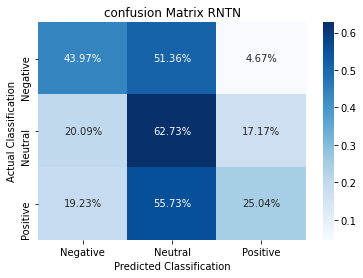

In [102]:
def graph(data):
    confusion_matrix1 =confusion_matrix_rnn(data)
    confusion_matrix1=confusion_matrix1.astype('float')/confusion_matrix1.sum(axis=1)[:,np.newaxis]
    ax = sns.heatmap(confusion_matrix1, annot =True, fmt='.2%', cmap='Blues')
    ax.set_title('confusion Matrix RNTN')
    ax.set_xlabel('Predicted Classification')
    ax.set_ylabel('Actual Classification')
    ax.xaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'])
    ax.yaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'])
    plt.savefig('rntn_phrases_66')
    plt.show()
#graph(agree_all)
#graph(agree_75)
graph(agree_66)
#graph(agree_50)